In [1]:
import scanpy as sc
import reComBat as rc

adata = sc.read_h5ad(
    '../data/tregs.tissue.scps.integrated.annotated.h5ad'
)
adata.X = adata.layers['counts'].copy()
adata

AnnData object with n_obs × n_vars = 9773 × 20912
    obs: 'sample_id', 'patient_id', 'status', 'tissue', 'cell_fraction', 'doublet', 'doublet_score', 'nFeature_RNA', 'nCount_RNA', 'percent_mt', 'percent_ribo', 'qc_pass', '_scvi_batch', '_scvi_labels', 'leiden_scvi_0.1', 'coarse_cell_types', 'leiden_scvi_0.4', 'dataset', 'sat1_status', 'clustering', 'sat1_status_majority_vote'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scvi', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

(0.0, 0.1)

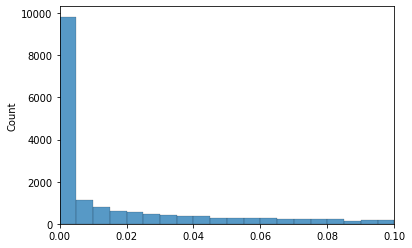

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

percent_expressed = np.array((adata.X > 0).sum(axis = 0) / adata.n_obs)[0, :]

fig, ax = plt.subplots()
sns.histplot(
    percent_expressed,
    ax = ax,
    binwidth = 0.005
)
ax.set_xlim(0, 0.1)

In [3]:
filtered_adatas = {
    p: adata[:, percent_expressed > p].copy()
    for p
    in [0.05, 0.01, 0.005, 0.001]
}

In [4]:
model = rc.reComBat(
    parametric = True,
    model = 'ridge',
    config = {'alpha':1e-9},
    conv_criterion = 1e-4,
    max_iter = 1000,
    n_jobs = 8,
    mean_only = False,         
    optimize_params = True,
    reference_batch = None,
    verbose = True
)

In [5]:
import pandas as pd


def prepare_data_for_recombat(adata):
    sc.pp.normalize_total(adata, target_sum = 1e4)
    norm_counts = adata.to_df()
    standardized_norm_counts = ((norm_counts.T - norm_counts.T.mean()) / norm_counts.T.std()).T
    return standardized_norm_counts


for p, bdata in filtered_adatas.items():
    df = prepare_data_for_recombat(bdata)
    result = model.fit_transform(
        df,
        adata.obs.sample_id,
    )
    result.to_csv(
        f'../scenic_resource/recombat_p{p}.tsv',
        sep = '\t'
    )

[reComBat] 2024-06-14 10:57:12,162 Starting to fot reComBat.
[reComBat] 2024-06-14 10:57:12,216 Fit the linear model.
[reComBat] 2024-06-14 10:57:13,938 Starting the empirical parametric optimisation.
[reComBat] 2024-06-14 10:57:15,450 Optimisation finished.
[reComBat] 2024-06-14 10:57:15,451 reComBat is fitted.
[reComBat] 2024-06-14 10:57:15,452 Starting to transform.
[reComBat] 2024-06-14 10:57:16,936 Transform finished.
[reComBat] 2024-06-14 10:58:42,880 Starting to fot reComBat.
[reComBat] 2024-06-14 10:58:42,967 Fit the linear model.
[reComBat] 2024-06-14 10:58:45,799 Starting the empirical parametric optimisation.
[reComBat] 2024-06-14 10:58:48,418 Optimisation finished.
[reComBat] 2024-06-14 10:58:48,419 reComBat is fitted.
[reComBat] 2024-06-14 10:58:48,422 Starting to transform.
[reComBat] 2024-06-14 10:58:50,810 Transform finished.
[reComBat] 2024-06-14 11:01:15,912 Starting to fot reComBat.
[reComBat] 2024-06-14 11:01:16,006 Fit the linear model.
[reComBat] 2024-06-14 11:01:

(0.0, 0.1)

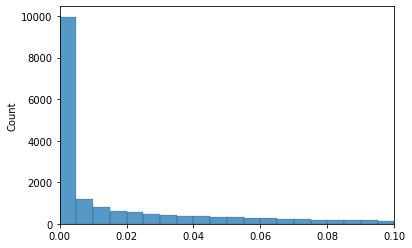

In [3]:
diseases = adata[adata.obs.status != 'normal', :].copy()

percent_expressed = np.array((diseases.X > 0).sum(axis = 0) / diseases.n_obs)[0, :]

fig, ax = plt.subplots()
sns.histplot(
    percent_expressed,
    ax = ax,
    binwidth = 0.005
)
ax.set_xlim(0, 0.1)

In [4]:
filtered_diseases = {
    p: diseases[:, percent_expressed > p].copy()
    for p
    in [0.05, 0.01, 0.005, 0.001]
}

In [5]:
model = rc.reComBat(
    parametric = True,
    model = 'ridge',
    config = {'alpha':1e-9},
    conv_criterion = 1e-4,
    max_iter = 1000,
    n_jobs = 8,
    mean_only = False,         
    optimize_params = True,
    reference_batch = None,
    verbose = True
)

In [8]:
import pandas as pd


def prepare_data_for_recombat(adata):
    sc.pp.normalize_total(adata, target_sum = 1e4)
    norm_counts = adata.to_df()
    standardized_norm_counts = ((norm_counts.T - norm_counts.T.mean()) / norm_counts.T.std()).T
    return standardized_norm_counts


for p, bdata in filtered_diseases.items():
    df = prepare_data_for_recombat(bdata)
    result = model.fit_transform(
        df,
        bdata.obs.sample_id,
    )
    result.to_csv(
        f'../scenic_resource/recombat_disease_only_p{p}.tsv',
        sep = '\t'
    )

[reComBat] 2024-06-17 11:15:59,070 Starting to fot reComBat.
[reComBat] 2024-06-17 11:15:59,094 Fit the linear model.
[reComBat] 2024-06-17 11:16:00,064 Starting the empirical parametric optimisation.
[reComBat] 2024-06-17 11:16:00,637 Optimisation finished.
[reComBat] 2024-06-17 11:16:00,639 reComBat is fitted.
[reComBat] 2024-06-17 11:16:00,640 Starting to transform.
[reComBat] 2024-06-17 11:16:01,285 Transform finished.
[reComBat] 2024-06-17 11:16:44,543 Starting to fot reComBat.
[reComBat] 2024-06-17 11:16:44,592 Fit the linear model.
[reComBat] 2024-06-17 11:16:46,071 Starting the empirical parametric optimisation.
[reComBat] 2024-06-17 11:16:47,215 Optimisation finished.
[reComBat] 2024-06-17 11:16:47,216 reComBat is fitted.
[reComBat] 2024-06-17 11:16:47,218 Starting to transform.
[reComBat] 2024-06-17 11:16:48,363 Transform finished.
[reComBat] 2024-06-17 11:17:57,089 Starting to fot reComBat.
[reComBat] 2024-06-17 11:17:57,139 Fit the linear model.
[reComBat] 2024-06-17 11:17: